In [154]:
import pandas as pd    
import numpy as np 
import os, sys
from flask import Flask, render_template, redirect, request, jsonify 
import missingno
import time
import random
import json
import seaborn as sns
import matplotlib.pyplot  as plt
from utils.apis_tb import dfjson

ModuleNotFoundError: No module named 'utils'

In [155]:
url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
data = pd.read_csv(url)
data.head(20)


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
5,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
6,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
7,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
8,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
9,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83


In [156]:
data.shape

(40326, 40)

In [157]:
Data_all_countries = data[(data.location == "Spain") | (data.location == "Iran") | (data.location == "Netherlands") | (data.location == "Mexico") | (data.location == "Brazil")]

In [158]:
dfjson(Data_all_countries)

NameError: name 'dfjson' is not defined

#3. Cleaning the dataset

In [159]:
Data_all_countries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1214 entries, 5195 to 33931
Data columns (total 40 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   iso_code                         1214 non-null   object 
 1   continent                        1214 non-null   object 
 2   location                         1214 non-null   object 
 3   date                             1214 non-null   object 
 4   total_cases                      1206 non-null   float64
 5   new_cases                        1206 non-null   float64
 6   new_cases_smoothed               1184 non-null   float64
 7   total_deaths                     1206 non-null   float64
 8   new_deaths                       1206 non-null   float64
 9   new_deaths_smoothed              1184 non-null   float64
 10  total_cases_per_million          1206 non-null   float64
 11  new_cases_per_million            1206 non-null   float64
 12  new_cases_smooth

In [160]:
#Changing date to datetime64 type and setting as index, saving the data in a new variable: data_covid which we will further continue to use.

Data_all_countries.date = pd.to_datetime(Data_all_countries.date) 
data_covid = Data_all_countries.set_index("date")
data_covid.head(10)

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-12-31,BRA,South America,Brazil,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
2020-01-01,BRA,South America,Brazil,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
2020-01-02,BRA,South America,Brazil,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
2020-01-03,BRA,South America,Brazil,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
2020-01-04,BRA,South America,Brazil,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
2020-01-05,BRA,South America,Brazil,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
2020-01-06,BRA,South America,Brazil,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
2020-01-07,BRA,South America,Brazil,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
2020-01-08,BRA,South America,Brazil,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88


 
Now we will continue having a look at the missing values.


Preview of data with null values:


,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-12-31,BRA,South America,Brazil,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
2020-01-01,BRA,South America,Brazil,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
2020-01-02,BRA,South America,Brazil,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88


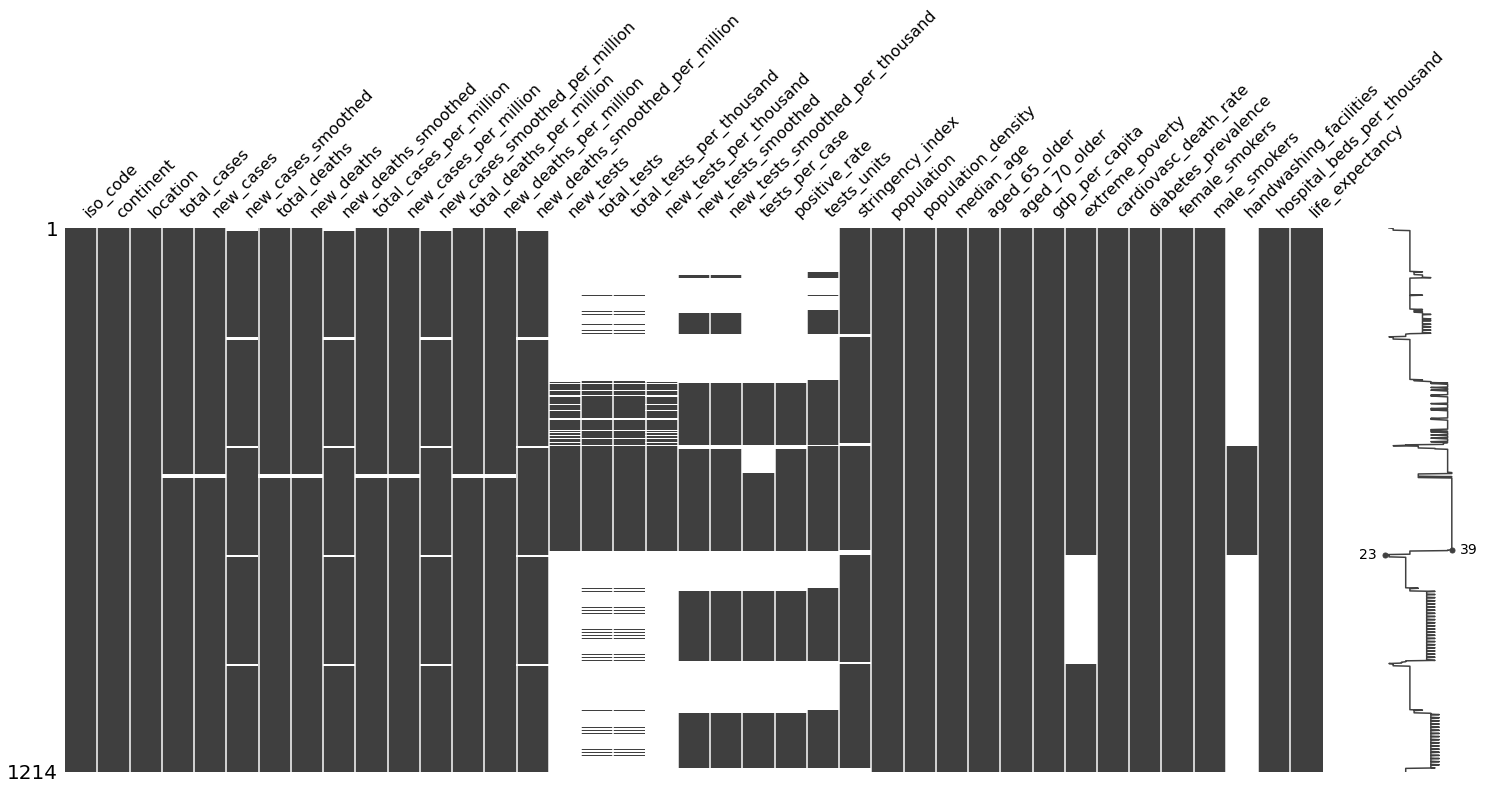

In [161]:
# generate preview of entries with null values. The white spaces demonstrate missing data.
if len(data_covid[data_covid.isnull().any(axis=1)] != 0):
    print("\nPreview of data with null values:")
    display(data_covid[data_covid.isnull().any(axis=1)].head(3))
    missingno.matrix(data_covid)
    plt.show()

In [162]:
#Removing the columns with too many NaN values:
data_covid.drop(["new_tests", "total_tests", "total_tests_per_thousand", "new_tests_per_thousand", "tests_units", "new_tests_smoothed", "new_tests_smoothed_per_thousand", "stringency_index", "extreme_poverty", "handwashing_facilities"], axis=1, inplace=True)

In [163]:
#Removing rows with only NaN values.
data_covid.dropna(axis=0, how="all", inplace=True)

 Now that we have checked the missing values, we will continue with the duplicated values.

In [164]:
#generate count statistics of duplicate entries

if len(data_covid[data_covid.duplicated()]) > 0:
    print("\n***Number of duplicated entries: ", len(data_covid[data_covid.duplicated()]))
    display(data_covid[data_covid.duplicated(keep=False)].sort_values(by=list(data_covid.columns)).head())
else:
    print("\nNo duplicated entries found")


***Number of duplicated entries:  270


,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,tests_per_case,positive_rate,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-06,BRA,South America,Brazil,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,10.1,17.9,2.2,75.88
2020-01-07,BRA,South America,Brazil,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,10.1,17.9,2.2,75.88
2020-01-08,BRA,South America,Brazil,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,10.1,17.9,2.2,75.88
2020-01-09,BRA,South America,Brazil,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,10.1,17.9,2.2,75.88
2020-01-10,BRA,South America,Brazil,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,10.1,17.9,2.2,75.88


In [165]:
#removing duplicated values. ## TODO maybe change this?? not sure if we want to remove all the duplicates?
data_covid.drop_duplicates(inplace=True)

In [166]:
#Removing rows with only NaN values.
data_covid.dropna(axis=0, how="all", inplace=True)

In [167]:
data_covid.columns

Index(['iso_code', 'continent', 'location', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'tests_per_case', 'positive_rate',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'cardiovasc_death_rate',
       'diabetes_prevalence', 'female_smokers', 'male_smokers',
       'hospital_beds_per_thousand', 'life_expectancy'],
      dtype='object')

In [168]:
#removing the columns that have irrelevant data for our study. # TODO have a look if we want to remove other columns as well. Depends on what we are actually analising.. hypothesis?

data_covid.drop(['iso_code', 'continent','gdp_per_capita','life_expectancy', 'cardiovasc_death_rate', 'diabetes_prevalence'], axis=1, inplace=True)

In [169]:
data_covid.head(10)

,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,tests_per_case,positive_rate,population,population_density,median_age,aged_65_older,aged_70_older,female_smokers,male_smokers,hospital_beds_per_thousand
date,,,,,,,,,,,,,,,,,,,,,,,
2019-12-31,Brazil,0.0,0.0,NaN,0.0,0.0,NaN,0.000,0.000,NaN,0.0,0.0,NaN,NaN,NaN,212559409.0,25.04,33.5,8.552,5.06,10.1,17.9,2.2
2020-01-06,Brazil,0.0,0.0,0.000,0.0,0.0,0.0,0.000,0.000,0.000,0.0,0.0,0.0,NaN,NaN,212559409.0,25.04,33.5,8.552,5.06,10.1,17.9,2.2
2020-02-26,Brazil,1.0,1.0,0.143,0.0,0.0,0.0,0.005,0.005,0.001,0.0,0.0,0.0,NaN,NaN,212559409.0,25.04,33.5,8.552,5.06,10.1,17.9,2.2
2020-02-27,Brazil,1.0,0.0,0.143,0.0,0.0,0.0,0.005,0.000,0.001,0.0,0.0,0.0,NaN,NaN,212559409.0,25.04,33.5,8.552,5.06,10.1,17.9,2.2
2020-03-01,Brazil,2.0,1.0,0.286,0.0,0.0,0.0,0.009,0.005,0.001,0.0,0.0,0.0,NaN,NaN,212559409.0,25.04,33.5,8.552,5.06,10.1,17.9,2.2
2020-03-02,Brazil,2.0,0.0,0.286,0.0,0.0,0.0,0.009,0.000,0.001,0.0,0.0,0.0,NaN,NaN,212559409.0,25.04,33.5,8.552,5.06,10.1,17.9,2.2
2020-03-04,Brazil,2.0,0.0,0.143,0.0,0.0,0.0,0.009,0.000,0.001,0.0,0.0,0.0,NaN,NaN,212559409.0,25.04,33.5,8.552,5.06,10.1,17.9,2.2
2020-03-05,Brazil,3.0,1.0,0.286,0.0,0.0,0.0,0.014,0.005,0.001,0.0,0.0,0.0,NaN,NaN,212559409.0,25.04,33.5,8.552,5.06,10.1,17.9,2.2
2020-03-06,Brazil,8.0,5.0,1.000,0.0,0.0,0.0,0.038,0.024,0.005,0.0,0.0,0.0,NaN,NaN,212559409.0,25.04,33.5,8.552,5.06,10.1,17.9,2.2


4. Studying and visualizing the data

- Brazil 

Brazil declared a public health emergency in early March (on the 17th of March 2020), just a few days after the World Health Organization. The Ministry of Health urged state officials to cancel public events and put social-distancing measures in place.

Despite non-essential businesses reopened on 9th of June 2020 in the city of Rio de Janeiro, the easing of restrictions marks the beginning of six phases of reopening planned by officials. This is the reason why we decided not to display the end of the "alarm state" as it hasn´t concluded yet.

However, the conflicting messages from the government left Brazilians uncertain about isolation measures, which led to low compliance. That in turn led to Brazil’s caseload being one of the highest in the world. Sources:

- https://en.wikipedia.org/wiki/COVID-19_pandemic_in_Brazil 
- https://covid19.who.int/region/amro/country/br

In [170]:
#Setting to display complete contents of our dataframe without any kind of truncation.
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

We will need to have a look the whole dataset without any truncation as we want to make sure we are taking into account only the useful information for our case. 

In [171]:
#Filtering the dataset for the data of Brazil and displaying all rows and columns to explore the dataset.
Brazil = data_covid[data_covid.location == "Brazil"]
Brazil.head(5)

,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,tests_per_case,positive_rate,population,population_density,median_age,aged_65_older,aged_70_older,female_smokers,male_smokers,hospital_beds_per_thousand
date,,,,,,,,,,,,,,,,,,,,,,,
2019-12-31,Brazil,0.0,0.0,NaN,0.0,0.0,NaN,0.000,0.000,NaN,0.0,0.0,NaN,NaN,NaN,212559409.0,25.04,33.5,8.552,5.06,10.1,17.9,2.2
2020-01-06,Brazil,0.0,0.0,0.000,0.0,0.0,0.0,0.000,0.000,0.000,0.0,0.0,0.0,NaN,NaN,212559409.0,25.04,33.5,8.552,5.06,10.1,17.9,2.2
2020-02-26,Brazil,1.0,1.0,0.143,0.0,0.0,0.0,0.005,0.005,0.001,0.0,0.0,0.0,NaN,NaN,212559409.0,25.04,33.5,8.552,5.06,10.1,17.9,2.2
2020-02-27,Brazil,1.0,0.0,0.143,0.0,0.0,0.0,0.005,0.000,0.001,0.0,0.0,0.0,NaN,NaN,212559409.0,25.04,33.5,8.552,5.06,10.1,17.9,2.2
2020-03-01,Brazil,2.0,1.0,0.286,0.0,0.0,0.0,0.009,0.005,0.001,0.0,0.0,0.0,NaN,NaN,212559409.0,25.04,33.5,8.552,5.06,10.1,17.9,2.2


We just filtered our dataset , as we are about to have a look the increasement of cases and deaths in Brazil from the very begining of alarm state until 8th May 2020.

In [172]:
#Drpping rows with unnecessary data
Brazil=Brazil.drop(Brazil.index[[0]]) 
Brazil.head(10)

,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,tests_per_case,positive_rate,population,population_density,median_age,aged_65_older,aged_70_older,female_smokers,male_smokers,hospital_beds_per_thousand
date,,,,,,,,,,,,,,,,,,,,,,,
2020-01-06,Brazil,0.0,0.0,0.000,0.0,0.0,0.0,0.000,0.000,0.000,0.0,0.0,0.0,NaN,NaN,212559409.0,25.04,33.5,8.552,5.06,10.1,17.9,2.2
2020-02-26,Brazil,1.0,1.0,0.143,0.0,0.0,0.0,0.005,0.005,0.001,0.0,0.0,0.0,NaN,NaN,212559409.0,25.04,33.5,8.552,5.06,10.1,17.9,2.2
2020-02-27,Brazil,1.0,0.0,0.143,0.0,0.0,0.0,0.005,0.000,0.001,0.0,0.0,0.0,NaN,NaN,212559409.0,25.04,33.5,8.552,5.06,10.1,17.9,2.2
2020-03-01,Brazil,2.0,1.0,0.286,0.0,0.0,0.0,0.009,0.005,0.001,0.0,0.0,0.0,NaN,NaN,212559409.0,25.04,33.5,8.552,5.06,10.1,17.9,2.2
2020-03-02,Brazil,2.0,0.0,0.286,0.0,0.0,0.0,0.009,0.000,0.001,0.0,0.0,0.0,NaN,NaN,212559409.0,25.04,33.5,8.552,5.06,10.1,17.9,2.2
2020-03-04,Brazil,2.0,0.0,0.143,0.0,0.0,0.0,0.009,0.000,0.001,0.0,0.0,0.0,NaN,NaN,212559409.0,25.04,33.5,8.552,5.06,10.1,17.9,2.2
2020-03-05,Brazil,3.0,1.0,0.286,0.0,0.0,0.0,0.014,0.005,0.001,0.0,0.0,0.0,NaN,NaN,212559409.0,25.04,33.5,8.552,5.06,10.1,17.9,2.2
2020-03-06,Brazil,8.0,5.0,1.000,0.0,0.0,0.0,0.038,0.024,0.005,0.0,0.0,0.0,NaN,NaN,212559409.0,25.04,33.5,8.552,5.06,10.1,17.9,2.2
2020-03-07,Brazil,13.0,5.0,1.714,0.0,0.0,0.0,0.061,0.024,0.008,0.0,0.0,0.0,NaN,NaN,212559409.0,25.04,33.5,8.552,5.06,10.1,17.9,2.2


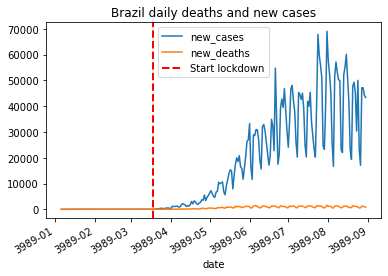

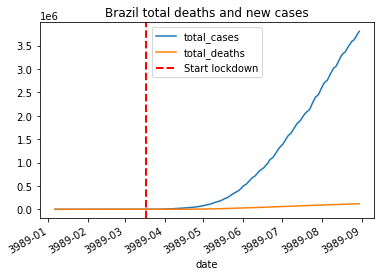

In [173]:
Br = Brazil[["new_cases", "new_deaths"]].plot()
Br.axvline(pd.to_datetime('2020-03-17'), color='r', linestyle='--', lw=2, label='Start lockdown')
plt.title("Brazil daily deaths and new cases")
plt.legend()


Br = Brazil[["total_cases", "total_deaths"]].plot()
Br.axvline(pd.to_datetime('2020-03-17'), color='r', linestyle='--', lw=2, label='Start lockdown')
plt.title("Brazil total deaths and new cases")
plt.legend()

In [174]:
def get_type(dato):
    return type(dato)


pd.DataFrame([pd.to_datetime('2020-03-17')])[0].apply(get_type)

0    <class 'pandas._libs.tslibs.timestamps.Timestamp'>
Name: 0, dtype: object

a. What position do your countries occupe respect to the number of total infected and total deaths?

  - Total infected:

In [175]:
#visualizaing again the original dasated to check the information we will need to answer this question 
data.date = pd.to_datetime(data.date) 
data_c = data.set_index("date")
data_c.head(10)

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-12-31,AFG,Asia,Afghanistan,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2020-01-01,AFG,Asia,Afghanistan,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2020-01-02,AFG,Asia,Afghanistan,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2020-01-03,AFG,Asia,Afghanistan,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2020-01-04,AFG,Asia,Afghanistan,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2020-01-05,AFG,Asia,Afghanistan,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2020-01-06,AFG,Asia,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2020-01-07,AFG,Asia,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2020-01-08,AFG,Asia,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83


7c. Are there outliers or some rare data?

Text(0.5, 1.0, 'Checking total cases outliers')

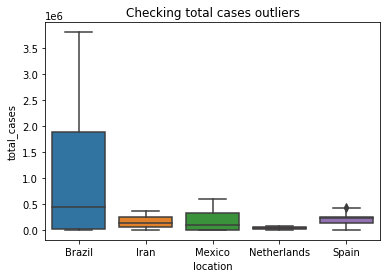

In [199]:
sns.boxplot(x = "location", y = "total_cases", data = data_covid)
plt.title("Checking total cases outliers")


Text(0.5, 1.0, 'Checking total deaths outliers')

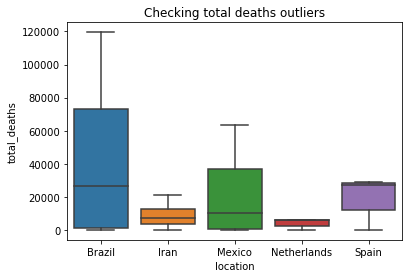

In [200]:
sns.boxplot(x = "location", y = "total_deaths", data = data_covid)
plt.title("Checking total deaths outliers")

Text(0.5, 1.0, 'Checking new cases outliers')

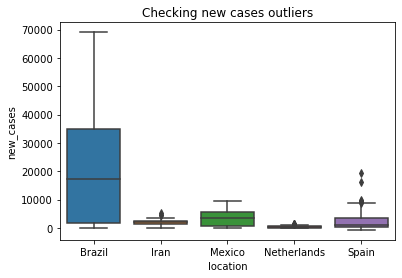

In [201]:
sns.boxplot(x = "location", y = "new_cases", data = data_covid)
plt.title("Checking new cases outliers")

Text(0.5, 1.0, 'Checking new deaths outliers')

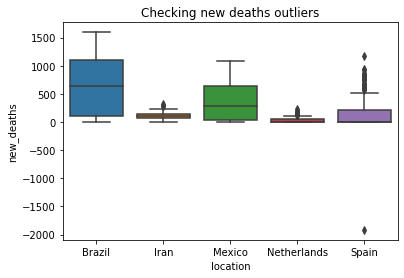

In [202]:
sns.boxplot(x = "location", y = "new_deaths", data = data_covid)
plt.title("Checking new deaths outliers")

Although we can see some outliers in Iran and the Netherlands ("new cases" and "new deaths" graphs), Spain is the one which stands out significantly.

- Checking Spain outliers:

We can see a large rebound in new cases in recent days, surpassing the cases registered during the quarantine period, probably due to the relaxation of general restrictions and the return to normality since the end of the state of alarm:

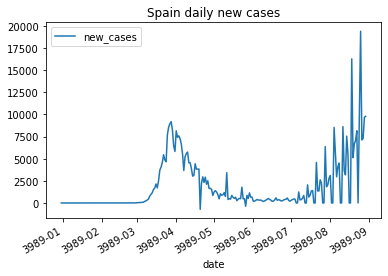

In [195]:
Sp = Spain[["new_cases"]].plot()
Br.axvline(pd.to_datetime('2020-03-17'), color='r', linestyle='--', lw=2, label='Start lockdown')
plt.title("Spain daily new cases")
plt.legend()


On the other hand, and as we have previously commented, the number of new deaths has a negative number around June 2020 as the spanish government changed its counting method. 
They have revised the amount by nearly 2,000 people as, some cases were counted twice and also to exclude deaths wrongly attributed to the virus. 

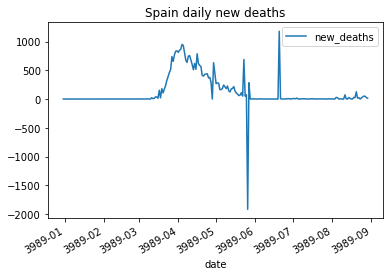

In [196]:
Sp = Spain[["new_deaths"]].plot()
Br.axvline(pd.to_datetime('2020-03-17'), color='r', linestyle='--', lw=2, label='Start lockdown')
plt.title("Spain daily new deaths")
plt.legend()